imports

In [1]:
import os
import pickle
import timit_to_ipa
import sim_phonemes
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import random
import seaborn as sns

functions to load the saved file which contains mapping from phoneme to codebook entry

In [2]:
def load_ph_code_entry_map(
    path_phn_file: str#path of file
):  # loading phoneme to codeentry mapping for the file
    with open(path_phn_file, "rb") as f:
        phn_dict = pickle.load(f)
    return phn_dict


def load_ph_code_entry_map_folder(
    pickle_path#path of folder
):  # loading phoneme to codeentry mapping for the whole folder
    phn_dict = {}
    for subdir, dirs, files in os.walk(pickle_path):
        for file in files:
            if "_phn.pkl" in file:
                phn_dict_f = load_ph_code_entry_map(
                    subdir + "/" + file
                )  # loading phoneme to codeentry mapping for the file
                for p, val in phn_dict_f.items():
                    if p in phn_dict:
                        phn_dict[p] += phn_dict_f[p]
                    else:
                        phn_dict[p] = phn_dict_f[p]
    return phn_dict


function to plot compression

In [3]:
def plot_compress(sim_mt, phn_to_dist_1_keys,type_of_compression = "TSNE", kmeans = False):
    if type_of_compression == "mds":
        compress = MDS(n_components=2, dissimilarity="precomputed", n_jobs=-1).fit_transform(
            sim_mt
        )
    elif type_of_compression == "TSNE":
        compress = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=3,random_state = 0).fit_transform(sim_mt)
    if kmeans == True:
        kmns = KMeans(n_clusters=7, random_state=0).fit(compress)
        colors_cluster = kmns.labels_
        sns.scatterplot(compress[:, 0], compress[:, 1],c = colors_cluster)
    else:
        sns.scatterplot(compress[:, 0], compress[:, 1])
    for i, phn in enumerate(phn_to_dist_1_keys):
        v = random.uniform(0, 0.5)
        plt.annotate(phn, (compress[:, 0][i], compress[:, 1][i]))
    plt.xlabel("TSNE axis 1")
    plt.ylabel("TSNE axis 2")
    plt.savefig("compress.pdf", bbox_inches="tight")

providing path folder which contains the phoneme to code entry mapping

In [4]:
codebook = 2
folder_name = "timit_pkl_wav2vec2"
path_folder = (
    f"/Users/mohammedmaqsoodshaik/Desktop/hiwi/task1/{folder_name}/codebook{codebook}/"
)
phn_dict = load_ph_code_entry_map_folder(path_folder)

calculating similarity with sorted phonemes and creating timit to ipa mappings

In [5]:
abs_discount = 0.00000000002 #absolute discounting hyperparameter
sim_mt,sorted_phonemes = sim_phonemes.similarity_calculation(phn_dict, phn_dict,abs_discount)#passing obtained dictionary with phonemes to codeentries mapping
labels = [timit_to_ipa.timit_2_ipa[k] for k in sorted_phonemes]#timit to ipa conversion

plotting similarity matrix, dendogram and compression

/Users/mohammedmaqsoodshaik/miniforge3/envs/wav2vec/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


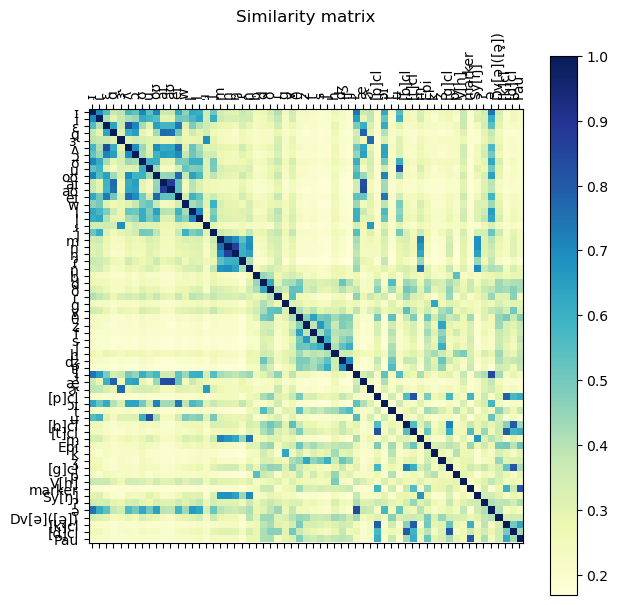

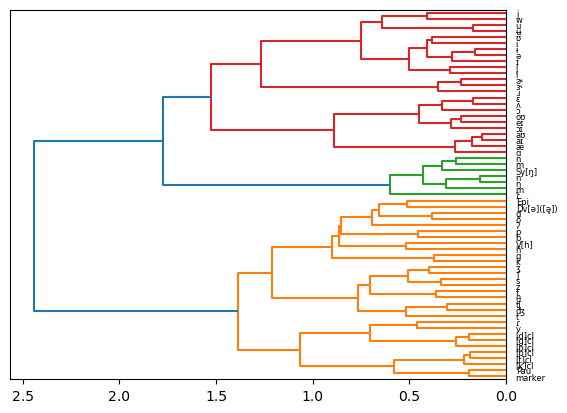

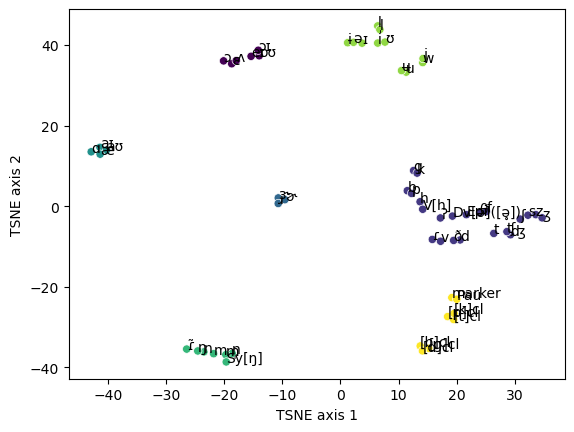

In [9]:
sim_phonemes.plot_sim(sim_mt, labels, labels)
plt.figure()
plot_compress(sim_mt, labels,"TSNE",True)
plt.show()